# Import libreries

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
%cd /content/drive/MyDrive/Github/HM2/

/content/drive/MyDrive/Github/HM2


In [102]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt


## Import the mini_data set

In [98]:
# nrows = 3.000.000 
nrows = 10000000
dataset = pd.read_csv('./steam_reviews.csv', header='infer', nrows = nrows)

KeyboardInterrupt: ignored

# Import the cleaned dataset + bonus

In [5]:
dataset = pd.read_csv('./df_cleaned.csv', header='infer')

In [7]:
# I think we don't need this

drop_column = ["comment_count", 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks','author.last_played']
dataset = dataset.drop(drop_column, axis = 1)

# Importing the bonus set

In [5]:
bonus1 = pd.read_csv('./bonus1_cleaned.csv', header='infer')
bonus2 = pd.read_csv('./bonus2_cleaned.csv', header='infer')

# The bonus dataset need to be cleaned (DON'T RUN IF USE THE CLEANED BONUS DATASET)

The problem with those dataset bonus are:

The type of the columuns are mess up: we need to change it according to the original dataset

A lot of columuns (for example timestamp) present multitype datas like bools tipe for time 

A lot of rows have NaN type 

There are two columns: Unnamed 0, Unnamed 0.1 to be drop

In [ ]:
bonus1 = pd.read_csv('./steam_reviews_bonus_1.csv', header='infer')
bonus2 = pd.read_csv('./steam_reviews_bonus_2.csv', header='infer')

In [ ]:
bonus1.info()

We don't need columns: "Unnamed: 0" and "Unnamed: 0.1" 

In [ ]:
bonus1 = bonus1.drop(["Unnamed: 0","Unnamed: 0.1"], axis = 1)
bonus2 = bonus2.drop(["Unnamed: 0","Unnamed: 0.1"], axis = 1)

DtypeWarning: Columns (0,8,9,10,14,15,16) have mixed types.

Let's see

In [ ]:
bonus1[bonus1["timestamp_updated"] ==  "False"] 

# NAN value detected

In [ ]:
bonus1 = bonus1.dropna()
bonus2 = bonus2.dropna()

In [ ]:
# drop duplicates

bonus1.drop_duplicates(inplace=True)
bonus1.reset_index(drop=True, inplace=True)
bonus2.drop_duplicates(inplace=True)
bonus2.reset_index(drop=True, inplace=True)

In [ ]:
dates_attributes = ['timestamp_created', 'timestamp_updated', 'author.last_played']
for i in dates_attributes:
    bonus1[i] = pd.to_datetime(bonus1[i], origin='unix', unit='s')
    bonus2[i] = pd.to_datetime(bonus2[i], origin='unix', unit='s')

In [ ]:
datacolumns_bool = ["recommended", "steam_purchase","received_for_free","written_during_early_access"]
bonus1[datacolumns_bool] = bonus1[datacolumns_bool].astype("bool")
bonus2[datacolumns_bool] = bonus2[datacolumns_bool].astype("bool")

In [ ]:
datacolumns_int = ["comment_count","author.steamid","author.num_games_owned","author.num_reviews","votes_helpful","votes_funny","app_id"]
bonus1[datacolumns_int] = bonus1[datacolumns_int].astype("int64")
bonus2[datacolumns_int] = bonus2[datacolumns_int].astype("int64")

In [ ]:
bonus1.to_csv('bonus1_cleaned.csv', index=False)
bonus2.to_csv('bonus2_cleaned.csv', index=False)

In [ ]:
del bonus1
del bonus2

## Understand the dataset  (NOT RUN IF USE CLEAN VERSION)

In [ ]:
dataset.columns

In [ ]:
dataset.head()

In [ ]:
def dateparse(time_in_secs):
  return pd.to_datetime(time_in_secs, unit='s')

In [ ]:
dataset = pd.read_csv('./steam_reviews.csv', header='infer',
                  nrows=10000000,
                  parse_dates=['timestamp_created', 
                  'timestamp_updated', 'author.last_played'],
                  date_parser=dateparse)

In [ ]:
dataset.head(1)

# [RQ2] Let's explore the dataset by finding simple insights into the reviews

## [RQ2.1] plot the number of reviews for each application in descending order

I'm creating a dataframeGroupby to store information for each application

In [12]:
app_group = dataset.groupby("app_name")

Counting the number of reviews for each group/application. Plot the application in descending order in a logarithmic scale for visibility pourpose

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32676 missing from current font.
  font.set_

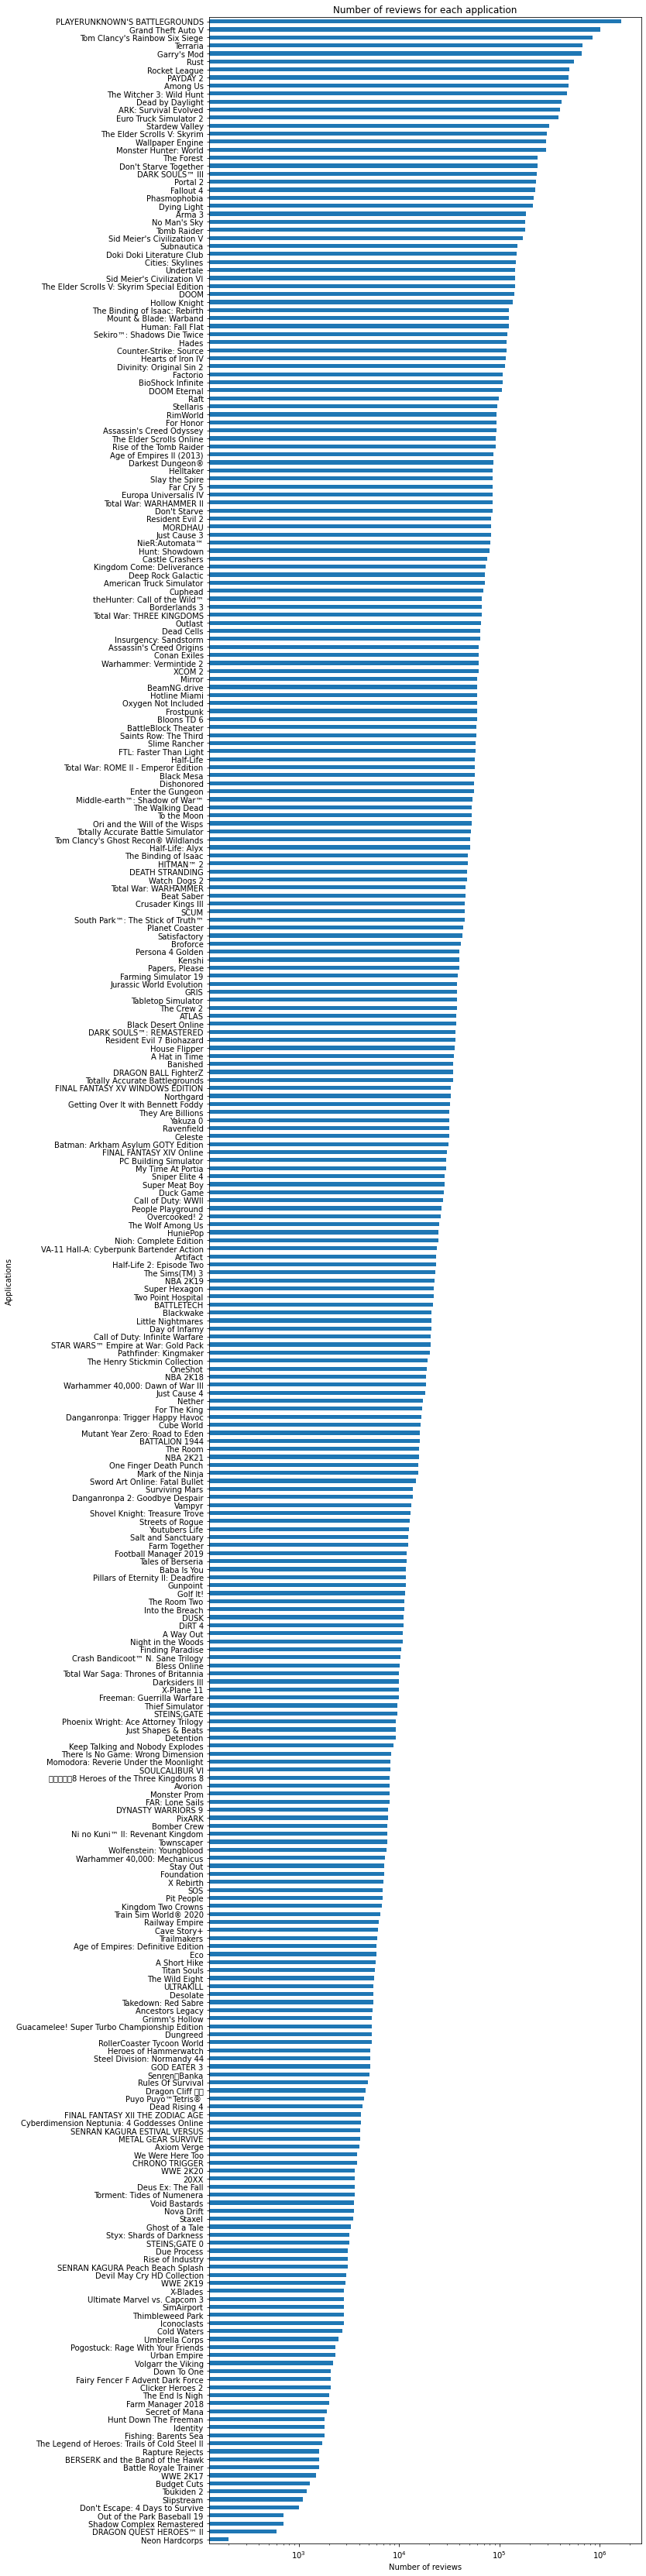

In [103]:
review_appcount = app_group["review_id"].count().sort_values(ascending=True)

ax = review_appcount.plot(kind = "barh", title = "Number of reviews for each application", figsize=(10, 60), logx = True)
ax.set_xlabel("Number of reviews")
ax.set_ylabel("Applications")
plt.show()

I have done a logx plot to better visualize the date, infact the highest application have a bigger x value respect the lowest. For the question we need to view a descending order of the application reviewed and with the logx plot i can also compare the biggest with the lowest. In standard plot we saw the descending order of the application, but for the most of the application the bar takes approx 0 value.

We can se that the biggest number of reviews is done to __PLAYERUNKNOWN'S BATTLEGROUNDS__, and the lowest number of reviews is done to __Neon Hardcorps__

## [RQ2.2] What applications have the best Weighted Vote Score?

Compute max of each group and taken the best

Output the 5 best to complete view of the best result

In [15]:
fivemaxscore_app = app_group["weighted_vote_score"].max().nlargest(5)
print(fivemaxscore_app)

app_name
Stardew Valley              0.995987
Divinity: Original Sin 2    0.995245
Subnautica                  0.994453
Mirror                      0.994038
Wallpaper Engine            0.993540
Name: weighted_vote_score, dtype: float64


In [16]:
maxscore_app = list(fivemaxscore_app.index)[0]
print(maxscore_app)

Stardew Valley


The application with the best Weighted Vote Score is: __Stardew Valley__ with __0.995987__ of score.

Second is __Divinity: Original Sin 2__ with  __0.995245__ of score, and third is __Subnautica__  with __0.994453__ of score.

## [RQ2.3] Which applications have the most and the least recommendations?

"Recommended" is boolean type (True = 1, False = 0). If we sum over each group by recommended value, we can take the most and the least recommendated app

In [17]:
recommended_app = app_group["recommended"].sum().sort_values(ascending=False)

In [18]:
print("The best recommended app is:\n", recommended_app.head(2),"\n")
print("The least recommended app is:\n", recommended_app.tail(2))

The best recommended app is:
 app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Grand Theft Auto V               831311
Name: recommended, dtype: int64 

The least recommended app is:
 app_name
DRAGON QUEST HEROES™ II    423
Neon Hardcorps              89
Name: recommended, dtype: int64


The best recommended app is __PLAYERUNKNOWN'S BATTLEGROUNDS__.

The least recommended app is __Neon Hardcorps__

## [RQ2.4] How many of these applications were purchased, and how many were given for free?


Purchased and given for free are booleans ( True = 1, False = 0). If we sum over each group by purchase (or received for free) value we can count how many

In [124]:
# getting keys of groupby best and least recommended app
best_app = recommended_app.head(1).index[0]
least_app = recommended_app.tail(1).index[0]

In [125]:
how_many_purchase_bestapp = app_group["steam_purchase"].get_group(best_app).sum()
how_many_free_bestapp = app_group["received_for_free"].get_group(best_app).sum()

In [126]:
how_many_purchase_leastapp = app_group["steam_purchase"].get_group(least_app).sum()
how_many_free_leastapp = app_group["received_for_free"].get_group(least_app).sum()

In [127]:
print("How many were purchased?\n", best_app, ": ",how_many_purchase_bestapp,"\n",least_app, ": ",how_many_purchase_leastapp)
print("\nHow many were given for free?\n", best_app, ": ",how_many_free_bestapp,"\n",least_app, ": ",how_many_free_leastapp)

How many were purchased?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  1372721 
 Neon Hardcorps :  29

How many were given for free?
 PLAYERUNKNOWN'S BATTLEGROUNDS :  61443 
 Neon Hardcorps :  27


In [128]:
df = pd.DataFrame([[how_many_purchase_bestapp,how_many_purchase_leastapp],[how_many_free_bestapp,how_many_free_leastapp]],
                  index = [best_app, least_app],
                  columns = ["Purchase","Given for free"])
df.style

,Purchase,Given for free
PLAYERUNKNOWN'S BATTLEGROUNDS,1372721,29
Neon Hardcorps,61443,27


# [RQ4] As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

## [RQ4.1] What are the top 3 languages used to review applications?

Each review is writting in one languages, so we groupby language and count the occurencies of the language for each group

In [24]:
n = 3

top_languages = dataset.groupby("language")["language"].count().sort_values(ascending = False)[:n]

In [25]:
top_languages

language
english     9580668
schinese    3729039
russian     2340950
Name: language, dtype: int64

In [26]:
top3_languages = list(top_languages[:3].index)
print(top3_languages)

['english', 'schinese', 'russian']


The top 3 languages used to review applications are:

__1:__ __english__ with 9635437 reviews <br>
__2:__ __schinese__ with 3764967 reviews<br>
__3:__ __russian__ with 2348900 reviews

## [RQ4.2] Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages

In [27]:
def filtered_language_reviews(dataset, languages):
    return dataset[dataset.language.isin(languages)]

## [RQ4.3] Use the function created in the previous literal to find what percentage of these reviews (associated with the top 3 languages) were voted as funny?

In the columns _funny_ and _helpful_ there is the number of steam account that voted that specific reviews as funny or helpful, so for count the number fo voted as funny (or helpful) just count the row of reviews with value > 0 (at least 1 vote)

In [28]:
filtered_dataset = filtered_language_reviews(dataset, top3_languages)

In [29]:
total_cases = filtered_dataset.shape[0]  
print(total_cases) 

15650657


In [30]:
fav_cases = filtered_dataset[filtered_dataset["votes_funny"] > 0].shape[0]
print(fav_cases)

1914182


In [31]:
percent_funny_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_funny_reviews))

12.23%


The percentage of reviews wrote with the 3 top langauages voted as funny is: __12.21%__   (1922726/15749304)

## [RQ4.4] Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [32]:
fav_cases = filtered_dataset[filtered_dataset["votes_helpful"] > 0].shape[0]
print(fav_cases)

4569398


In [33]:
percent_helpful_reviews = 100*fav_cases/total_cases
print("{:.2f}%".format(percent_helpful_reviews))

29.20%


The percentage of reviews wrote with the 3 top langauages voted as helpful is: __29.16%__  (4592926/15749304)

# [RQ5] The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

#### [RQ5.1] Plot the top 10 most popular reviewers and the number of reviews

For each steam_id (i.e. person) we count how many reviews did he do in the csv dataset and plot the 10 most popular reviewers.

In [41]:
reviewer_group_top10 = dataset.groupby("author.steamid")["review_id"].count().nlargest(10)

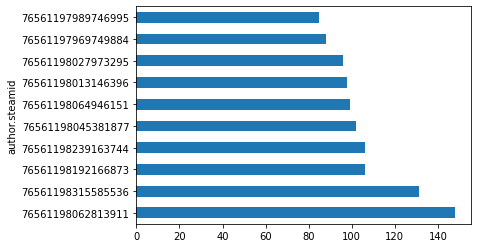

In [42]:
reviewer_group_top10.plot.barh(x = "author.steamid", y = "author.num_reviews")
plt.show()

## [RQ5.2] What applications did the most popular author review?

We take the steam_id of the top reviewer, than take the dataset of that person

In [129]:
steam_id_top_reviewer = list(reviewer_group_top10.head(1).index)[0]

In [130]:
top_reviewer_dataset = dataset[dataset["author.steamid"] == steam_id_top_reviewer].copy()

In [131]:
app_top_reviewer = top_reviewer_dataset2["app_name"]

The list of the applications the most popular author reviews:

In [132]:
for app in app_top_reviewer:
    print("{}\n".format(app))


Half-Life

Counter-Strike: Source

Half-Life 2: Episode Two

Portal 2

Garry's Mod

Sid Meier's Civilization V

Dead by Daylight

Sid Meier's Civilization VI

Subnautica

Human: Fall Flat

Banished

Celeste

Getting Over It with Bennett Foddy

A Hat in Time

The Forest

Axiom Verge

The Binding of Isaac: Rebirth

To the Moon

Cave Story+

Titan Souls

Super Meat Boy

Don't Escape: 4 Days to Survive

Volgarr the Viking

Enter the Gungeon

Salt and Sanctuary

Hollow Knight

The End Is Nigh

Factorio

RimWorld

Insurgency: Sandstorm

Euro Truck Simulator 2

Foundation

Kenshi

Into the Breach

Warhammer: Vermintide 2

DOOM Eternal

Age of Empires: Definitive Edition

Void Bastards

Stardew Valley

Among Us

Blackwake

Little Nightmares

Bomber Crew

Rust

HITMAN™ 2

Phasmophobia

Mount & Blade: Warband

Resident Evil 2

Slime Rancher

Hotline Miami

Tomb Raider

BattleBlock Theater

Dishonored

South Park™: The Stick of Truth™

Undertale

Don't Starve

Rocket League

Dead Cells

Broforce


## [RQ5.3] How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

We have a dataset groupby of the top reviewer in which are store all the information needed: 
- steam_purchase: Yes (True) / No (False)
- receved_for_free: Yes (True) / No (False)


In [47]:
total_cases = top_reviewer_dataset.shape[0] 
total_cases

148

In [136]:
number_of_purchase = top_reviewer_dataset2[top_reviewer_dataset2.steam_purchase == True].shape[0]
number_of_free = top_reviewer_dataset2[top_reviewer_dataset2.received_for_free == True].shape[0]

In [137]:
percent_of_purchase = 100*number_of_purchase/total_cases
percent_of_free = 100*number_of_free/total_cases

In [138]:
print("{:.2f}%".format(percent_of_purchase),"\n","{:.2f}%".format(percent_of_free))
print("\n\n",number_of_purchase,"\n",number_of_free)

73.65% 
 2.70%


 109 
 4


Among the applications he reviews in that period of time, the most popular author purchased __110__ of this applications (73.65%) and __4__ were given for free (2.70%).


## [RQ5.4] How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [150]:
purchase_app = top_reviewer_dataset[top_reviewer_dataset.steam_purchase == True]
free_app = top_reviewer_dataset[top_reviewer_dataset.received_for_free == True]

In [151]:
number_of_pur_pos = purchase_app[purchase_app.recommended == True].shape[0]
number_of_pur_pos

107

In [152]:
number_of_pur_neg = purchase_app[purchase_app.recommended == False].shape[0]
number_of_pur_neg

2

In [153]:
number_of_free_pos = free_app[free_app.recommended == True].shape[0]
number_of_free_pos

4

In [154]:
number_of_free_neg = free_app[free_app.recommended == False].shape[0]
number_of_free_neg

0

Among the __110__ application purchased they reviews he:<br>
give positive recommendation: to __108__ of them<br>
give negative recommendation: to __2__ of them


Among the __4__ application purchased they reviews he:<br>
give positive recommendation: to __4__ of them<br>
give negative recommendation: to __0__ of them



# [RQ6] It's time to get information from the updates that a user does to his reviews.

#### What is the average time (days and minutes) a user lets pass before he updates a review?

In [82]:
#Find time difference between updated and created time
df_start   = pd.to_datetime(dataset["timestamp_created"])
df_updated = pd.to_datetime(dataset["timestamp_updated"])

In [83]:
df_diff = df_updated-df_start

In [84]:
mean_time = df_diff[df_diff > "0 days 00:00:00"].mean()
mean_time

Timedelta('321 days 22:06:18.839744728')

In [85]:
def convert_time(time):
    seconds = time.seconds
    minutes = seconds // 60
    days = time.days
    return minutes, days

In [86]:
days, minutes = convert_time(mean_time)

In [87]:
print("{} Days and {} minutes".format(days,minutes))

1326 Days and 321 minutes


#### Plot the top 3 authors that usually update their reviews.

In [90]:
update_author = dataset[df_diff > "0 days 00:00:00"].groupby("author.steamid")

In [91]:
top3_author = update_author["review_id"].count().nlargest(3)

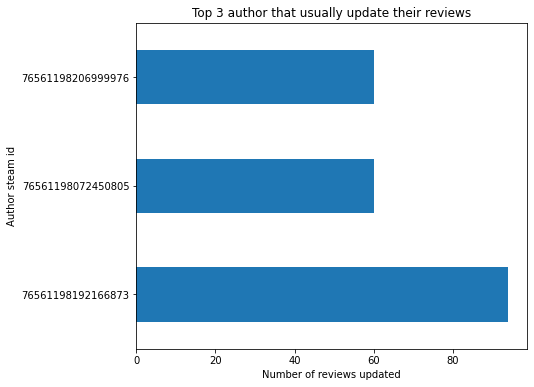

In [92]:
ax = top3_author.plot(kind = "barh", title = "Top 3 author that usually update their reviews", figsize=(7, 6))
ax.set_ylabel("Author steam id")
ax.set_xlabel("Number of reviews updated")
plt.show()

# TQ2: 

## Computational cost
%% 

First of all we need to assume that $n < len(a)$ and $n > 0$. The first assumption is becasue if $n \geq len(a)$ the function goes out of index range in access the element of the array a in the function swapList. 
The second is just for working reason: the function swap the list so $n = \text{"first n index to be swapped in the array"}$ so we might want to have input n to be positive. If negative is ok either. 

This function swapList is a $\mathcal{O}(\frac{3}{2}n)$ because we have a:
\begin{equation*}
    \sum_{i=0}^{n/2} (\Theta(1) + \Theta(1) +  
    \Theta(1) ) = (\frac{n}{2}+1)(3\Theta(1)) = \Theta(\frac{3}{2}n)
\end{equation*}

Take $T(n)$ the running cost equation of the function splitSwap. First of all is a recursive function so we identify the base cases: $T(n=0)=T(n=1)=\Theta(1)$.

The function:
\begin{equation*}
    T(n) = T(n/2)+T(n/2)+\Theta(\frac{3}{2}n) = 2T(n/2)+\Theta(\frac{3}{2}n) 
\end{equation*}
Now we resolve the function iterating over:
\begin{align*}
    T(n) &= 2T(\frac{n}{2})+\Theta(\frac{3}{2}n)\\
        &= 2\bigg[ 2T(\frac{\frac{n}{2}}{2})+\Theta(\frac{3}{2}\frac{n}{2})\bigg] +\Theta(\frac{3}{2}n)
        = 2^2T(\frac{n}{2^2}) + 2\Theta(\frac{3}{2}n)\\
        &= 2^2\bigg[ 2T(\frac{\frac{n}{2^2}}{2}) +\Theta(\frac{3}{2}\frac{n}{2^2})\bigg] + 2\Theta(\frac{3}{2}n)
        = 2^3T(\frac{n}{2^3})+ 3\Theta(\frac{3}{2}n)\\
        &= \ldots = \\
        &= 2^kT(\frac{n}{2^k})+k\Theta(\frac{3}{2}n)\\
        &= \text{stop in $\frac{n}{2^k}=1 \xrightarrow{} k = \log(n)$}\\
        &= nT(1) + \log(n)\Theta(\frac{3}{2}n)\\
        &= \Theta(n) + \Theta(\frac{3}{2}n\log(n))\\
        &= \Theta(\frac{3}{2}n\log(n)) = \mathcal{O}(2n\log(n))
\end{align*}

### What does the algorithm? <br>
The algorithm, more precisly splitSwap(a, 0, n) take as input an array a, the start index = 0, and n = "where split the array". We start with the full array a, and the function will return the array with the first n element of the list swapped. 

In the function there is two call of the same function splitSwap that split the array in sub-array of len every time halved until the len(sub-array) = 1. When this appen we begin to traversal going back call by call of the recursive function to the beginning passing by the function swapList that swap the sub array of input. Then the sub array flipped is again call back by their recursive function and is passed to swapList who swap again the element until we arrive to the first call we have done at the beginning with the all array length and apply the last swapList.